# Importing Libraries

In [73]:

#!pip install keras
#!pip install tensorflow

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop 

# Displaying Images

In [74]:
picture_size = 48
folder_path = "C:/Users/Diana/Desktop/Emotion_Recognation_Matei_Diana/images/images"  
folder_path_train= folder_path+"/train"
folder_path_validation=folder_path+"/validation"

In [75]:
for expression in os.listdir(folder_path_train):
    print(str(len(os.listdir(folder_path_train+"/" +expression))) + " " + expression + " images")   

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


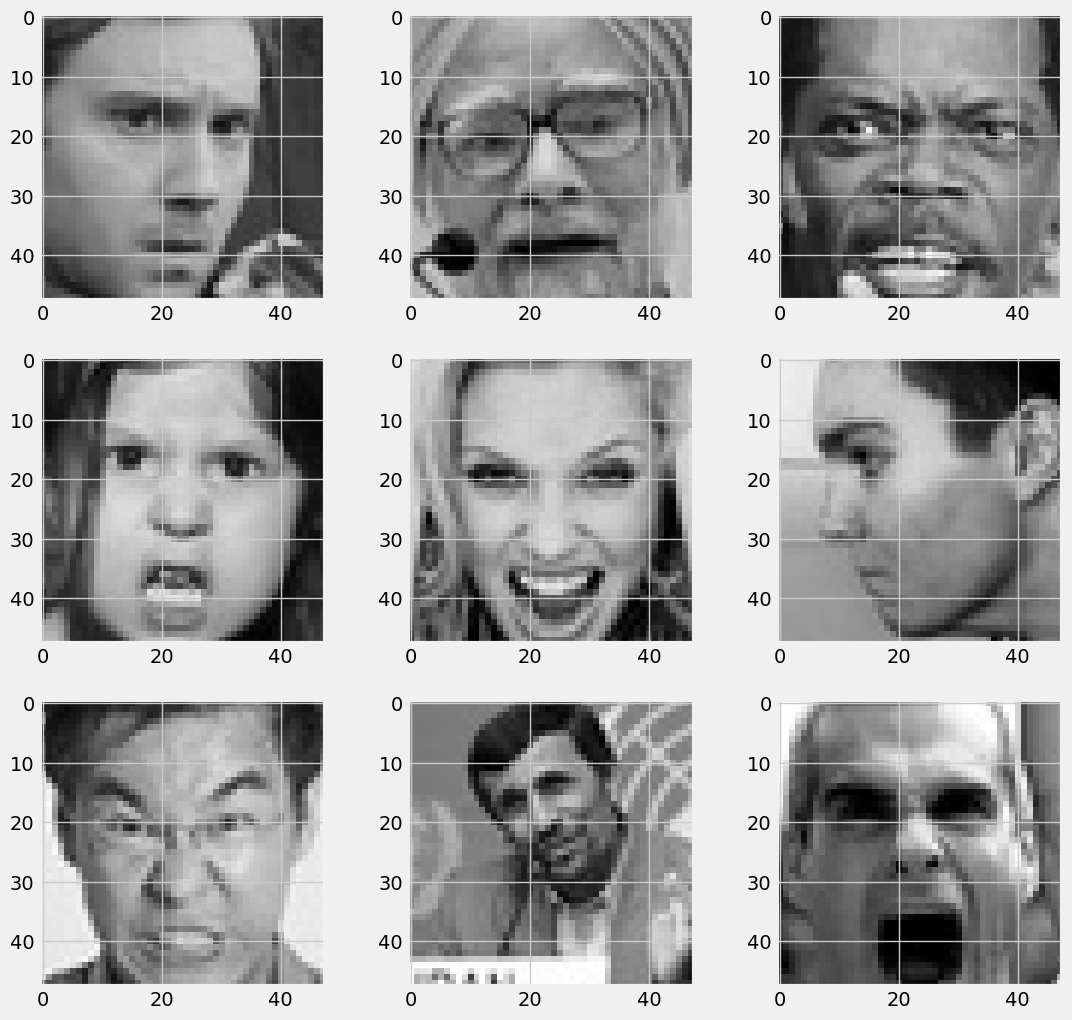

In [76]:
#afisarea setului de date pentru o anumita emotie

expression = "angry"

plt.figure(figsize=(12, 12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img_folder_path = folder_path_train+"/"+expression
    img_file_list = os.listdir(img_folder_path)

    img_path = os.path.join(img_folder_path, img_file_list[i-1])
    
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()


# Making Training and Validation Data

In [77]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path_train,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(   folder_path_validation,
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [78]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_48 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_48 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_48 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 128)      

# Fitting the Model with Training and Validation Data 

In [79]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,  
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [81]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\Diana\AppData\Local\Temp\ipykernel_22036\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.6558 - accuracy: 0.3522WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 295s 1s/step - loss: 1.6558 - accuracy: 0.3522 - val_loss: 1.5951 - val_accuracy: 0.3702 - lr: 0.0100
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.6205 - accuracy: 0.3674WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 283s 1s/step - loss: 1.6205 - accuracy: 0.3674 - val_loss: 1.5325 - val_accuracy: 0.4084 - lr: 0.0100
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.5781 - accuracy: 0.3817WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 302s 1s/step - loss: 1.5781 - accuracy: 0.3817 - val_loss: 1.6965 - val_accuracy: 0.3798 - lr: 0.0100
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.5573 - accuracy: 0.3903WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 376s 2s/step - loss: 1.5573 - accuracy: 0.3903 - val_loss: 1.7462 - val_accuracy: 0.3588 - lr: 0.0100
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.5291 - accuracy: 0.4084WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 510s 2s/step - loss: 1.5291 - accuracy: 0.4084 - val_loss: 1.5303 - val_accuracy: 0.4121 - lr: 0.0100
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.5062 - accuracy: 0.4162WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 410s 2s/step - loss: 1.5062 - accuracy: 0.4162 - val_loss: 1.5231 - val_accuracy: 0.4168 - lr: 0.0100
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.4864 - accuracy: 0.4274WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 378s 2s/step - loss: 1.4864 - accuracy: 0.4274 - val_loss: 1.8336 - val_accuracy: 0.3493 - lr: 0.0100
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 1.4673 - accuracy: 0.4287WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 335s 1s/step - loss: 1.4673 - accuracy: 0.4287 - val_loss: 1.4238 - val_accuracy: 0.4510 - lr: 0.0100
Epoch 9/48
225/225 [==============================] - ETA: 0s - loss: 1.4455 - accuracy: 0.4391WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 353s 2s/step - loss: 1.4455 - accuracy: 0.4391 - val_loss: 1.4378 - val_accuracy: 0.4507 - lr: 0.0100
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 1.4298 - accuracy: 0.4453WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 422s 2s/step - loss: 1.4298 - accuracy: 0.4453 - val_loss: 1.3683 - val_accuracy: 0.4706 - lr: 0.0100
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 1.4152 - accuracy: 0.4506WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 358s 2s/step - loss: 1.4152 - accuracy: 0.4506 - val_loss: 1.4525 - val_accuracy: 0.4564 - lr: 0.0100
Epoch 12/48
225/225 [==============================] - ETA: 0s - loss: 1.3972 - accuracy: 0.4608WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 336s 1s/step - loss: 1.3972 - accuracy: 0.4608 - val_loss: 1.4265 - val_accuracy: 0.4599 - lr: 0.0100
Epoch 13/48
225/225 [==============================] - ETA: 0s - loss: 1.3824 - accuracy: 0.4682WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 377s 2s/step - loss: 1.3824 - accuracy: 0.4682 - val_loss: 1.3144 - val_accuracy: 0.4964 - lr: 0.0100
Epoch 14/48
225/225 [==============================] - ETA: 0s - loss: 1.3681 - accuracy: 0.4760WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 367s 2s/step - loss: 1.3681 - accuracy: 0.4760 - val_loss: 1.4359 - val_accuracy: 0.4608 - lr: 0.0100
Epoch 15/48
225/225 [==============================] - ETA: 0s - loss: 1.3532 - accuracy: 0.4779WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 346s 2s/step - loss: 1.3532 - accuracy: 0.4779 - val_loss: 1.3115 - val_accuracy: 0.4940 - lr: 0.0100
Epoch 16/48
225/225 [==============================] - ETA: 0s - loss: 1.3450 - accuracy: 0.4802WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 355s 2s/step - loss: 1.3450 - accuracy: 0.4802 - val_loss: 1.3105 - val_accuracy: 0.4949 - lr: 0.0100
Epoch 17/48
225/225 [==============================] - ETA: 0s - loss: 1.3325 - accuracy: 0.4903WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 353s 2s/step - loss: 1.3325 - accuracy: 0.4903 - val_loss: 1.3420 - val_accuracy: 0.4831 - lr: 0.0100
Epoch 18/48
225/225 [==============================] - ETA: 0s - loss: 1.3243 - accuracy: 0.4884WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 347s 2s/step - loss: 1.3243 - accuracy: 0.4884 - val_loss: 1.2874 - val_accuracy: 0.5051 - lr: 0.0100
Epoch 19/48
225/225 [==============================] - ETA: 0s - loss: 1.3104 - accuracy: 0.4973WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 337s 1s/step - loss: 1.3104 - accuracy: 0.4973 - val_loss: 1.2947 - val_accuracy: 0.5043 - lr: 0.0100
Epoch 20/48
225/225 [==============================] - ETA: 0s - loss: 1.2989 - accuracy: 0.5045WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 362s 2s/step - loss: 1.2989 - accuracy: 0.5045 - val_loss: 1.2823 - val_accuracy: 0.5087 - lr: 0.0100
Epoch 21/48
225/225 [==============================] - ETA: 0s - loss: 1.2951 - accuracy: 0.5024WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 368s 2s/step - loss: 1.2951 - accuracy: 0.5024 - val_loss: 1.2879 - val_accuracy: 0.5072 - lr: 0.0100
Epoch 22/48
225/225 [==============================] - ETA: 0s - loss: 1.2867 - accuracy: 0.5084WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 380s 2s/step - loss: 1.2867 - accuracy: 0.5084 - val_loss: 1.2664 - val_accuracy: 0.5142 - lr: 0.0100
Epoch 23/48
225/225 [==============================] - ETA: 0s - loss: 1.2802 - accuracy: 0.5092WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 378s 2s/step - loss: 1.2802 - accuracy: 0.5092 - val_loss: 1.2371 - val_accuracy: 0.5236 - lr: 0.0100
Epoch 24/48
225/225 [==============================] - ETA: 0s - loss: 1.2633 - accuracy: 0.5153WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 315s 1s/step - loss: 1.2633 - accuracy: 0.5153 - val_loss: 1.2260 - val_accuracy: 0.5298 - lr: 0.0100
Epoch 25/48
225/225 [==============================] - ETA: 0s - loss: 1.2569 - accuracy: 0.5180WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 300s 1s/step - loss: 1.2569 - accuracy: 0.5180 - val_loss: 1.2456 - val_accuracy: 0.5222 - lr: 0.0100
Epoch 26/48
225/225 [==============================] - ETA: 0s - loss: 1.2492 - accuracy: 0.5206WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 355s 2s/step - loss: 1.2492 - accuracy: 0.5206 - val_loss: 1.2399 - val_accuracy: 0.5223 - lr: 0.0100
Epoch 27/48
225/225 [==============================] - ETA: 0s - loss: 1.2473 - accuracy: 0.5231Restoring model weights from the end of the best epoch: 24.



Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
225/225 [==============================] - 373s 2s/step - loss: 1.2473 - accuracy: 0.5231 - val_loss: 1.2636 - val_accuracy: 0.5077 - lr: 0.0100
Epoch 27: early stopping


# Plotting Accuracy & Loss

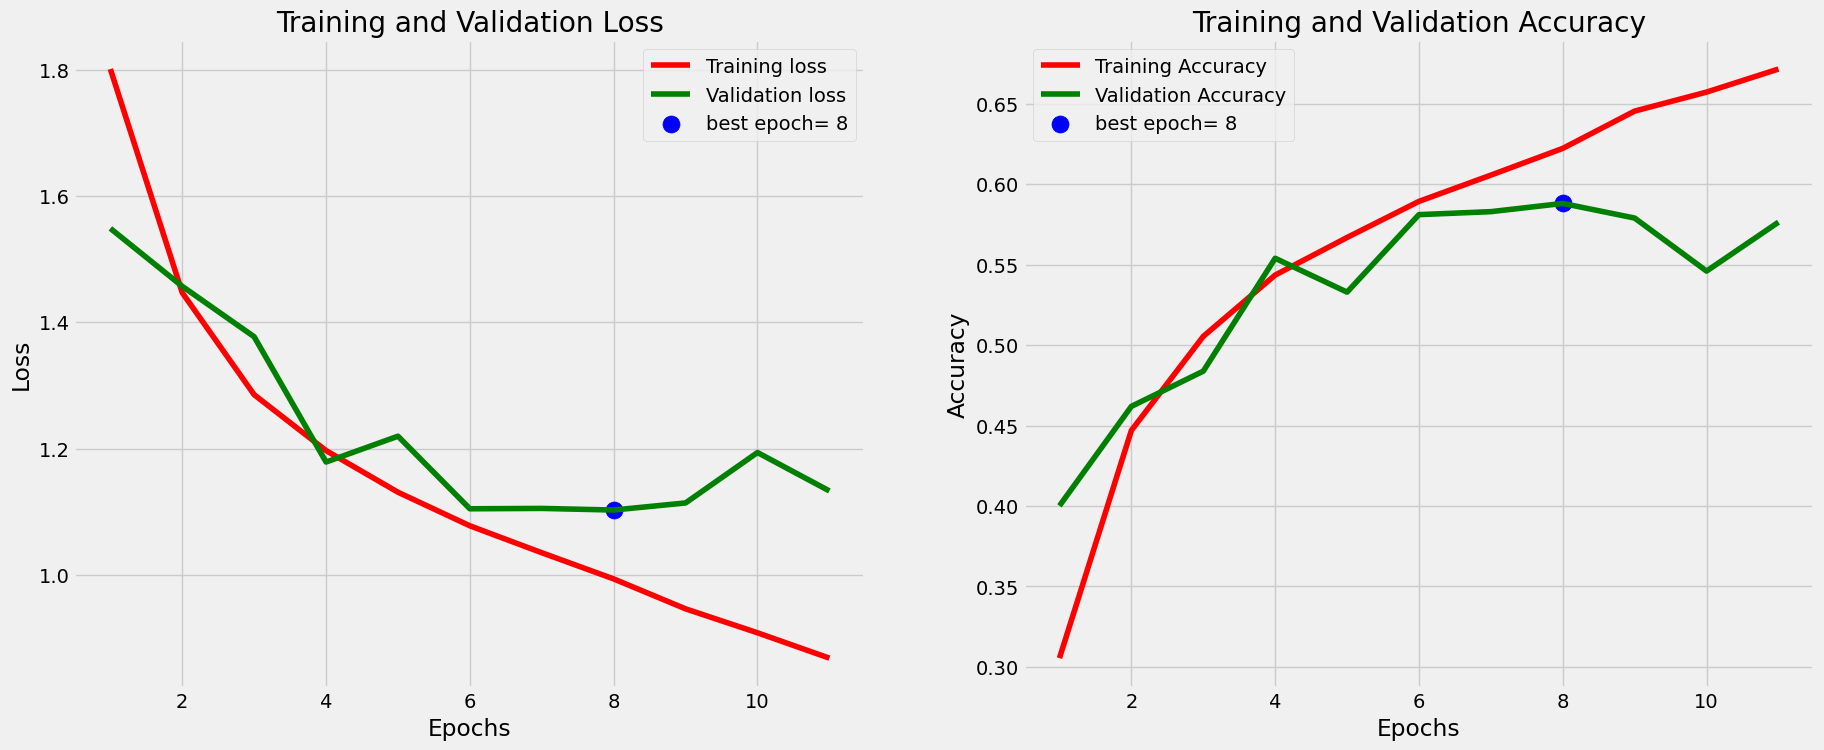

In [ ]:

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}' 

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
model.save(os.path.join("C:/Users/Diana/Desktop/cnn-test-diana"))
model

INFO:tensorflow:Assets written to: C:/Users/Diana/Desktop/cnn-test-diana\assets


INFO:tensorflow:Assets written to: C:/Users/Diana/Desktop/cnn-test-diana\assets


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path_validation,
    color_mode="grayscale",
    label_mode="categorical",
    interpolation="area",
    validation_split=0.99,
    subset="validation",
    seed=123,
    image_size=(48, 48),
    batch_size=batch_size)
test_ds, test_ds.class_names

Found 7066 files belonging to 7 classes.
Using 6995 files for validation.


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>,
 ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])

In [ ]:
# Create a new model instance
model_loaded = tf.keras.models.load_model(os.path.join("C:/Users/Diana/Desktop/cnn-test-diana"))
model_loaded.evaluate(test_set)

56/56 [==============================] - 42s 710ms/step - loss: 1.1004 - accuracy: 0.5890


[1.1003949642181396, 0.5890178084373474]

Found 7066 files belonging to 7 classes.
Using 6995 files for validation.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
1/1 [==============================] - 0s 26ms/step


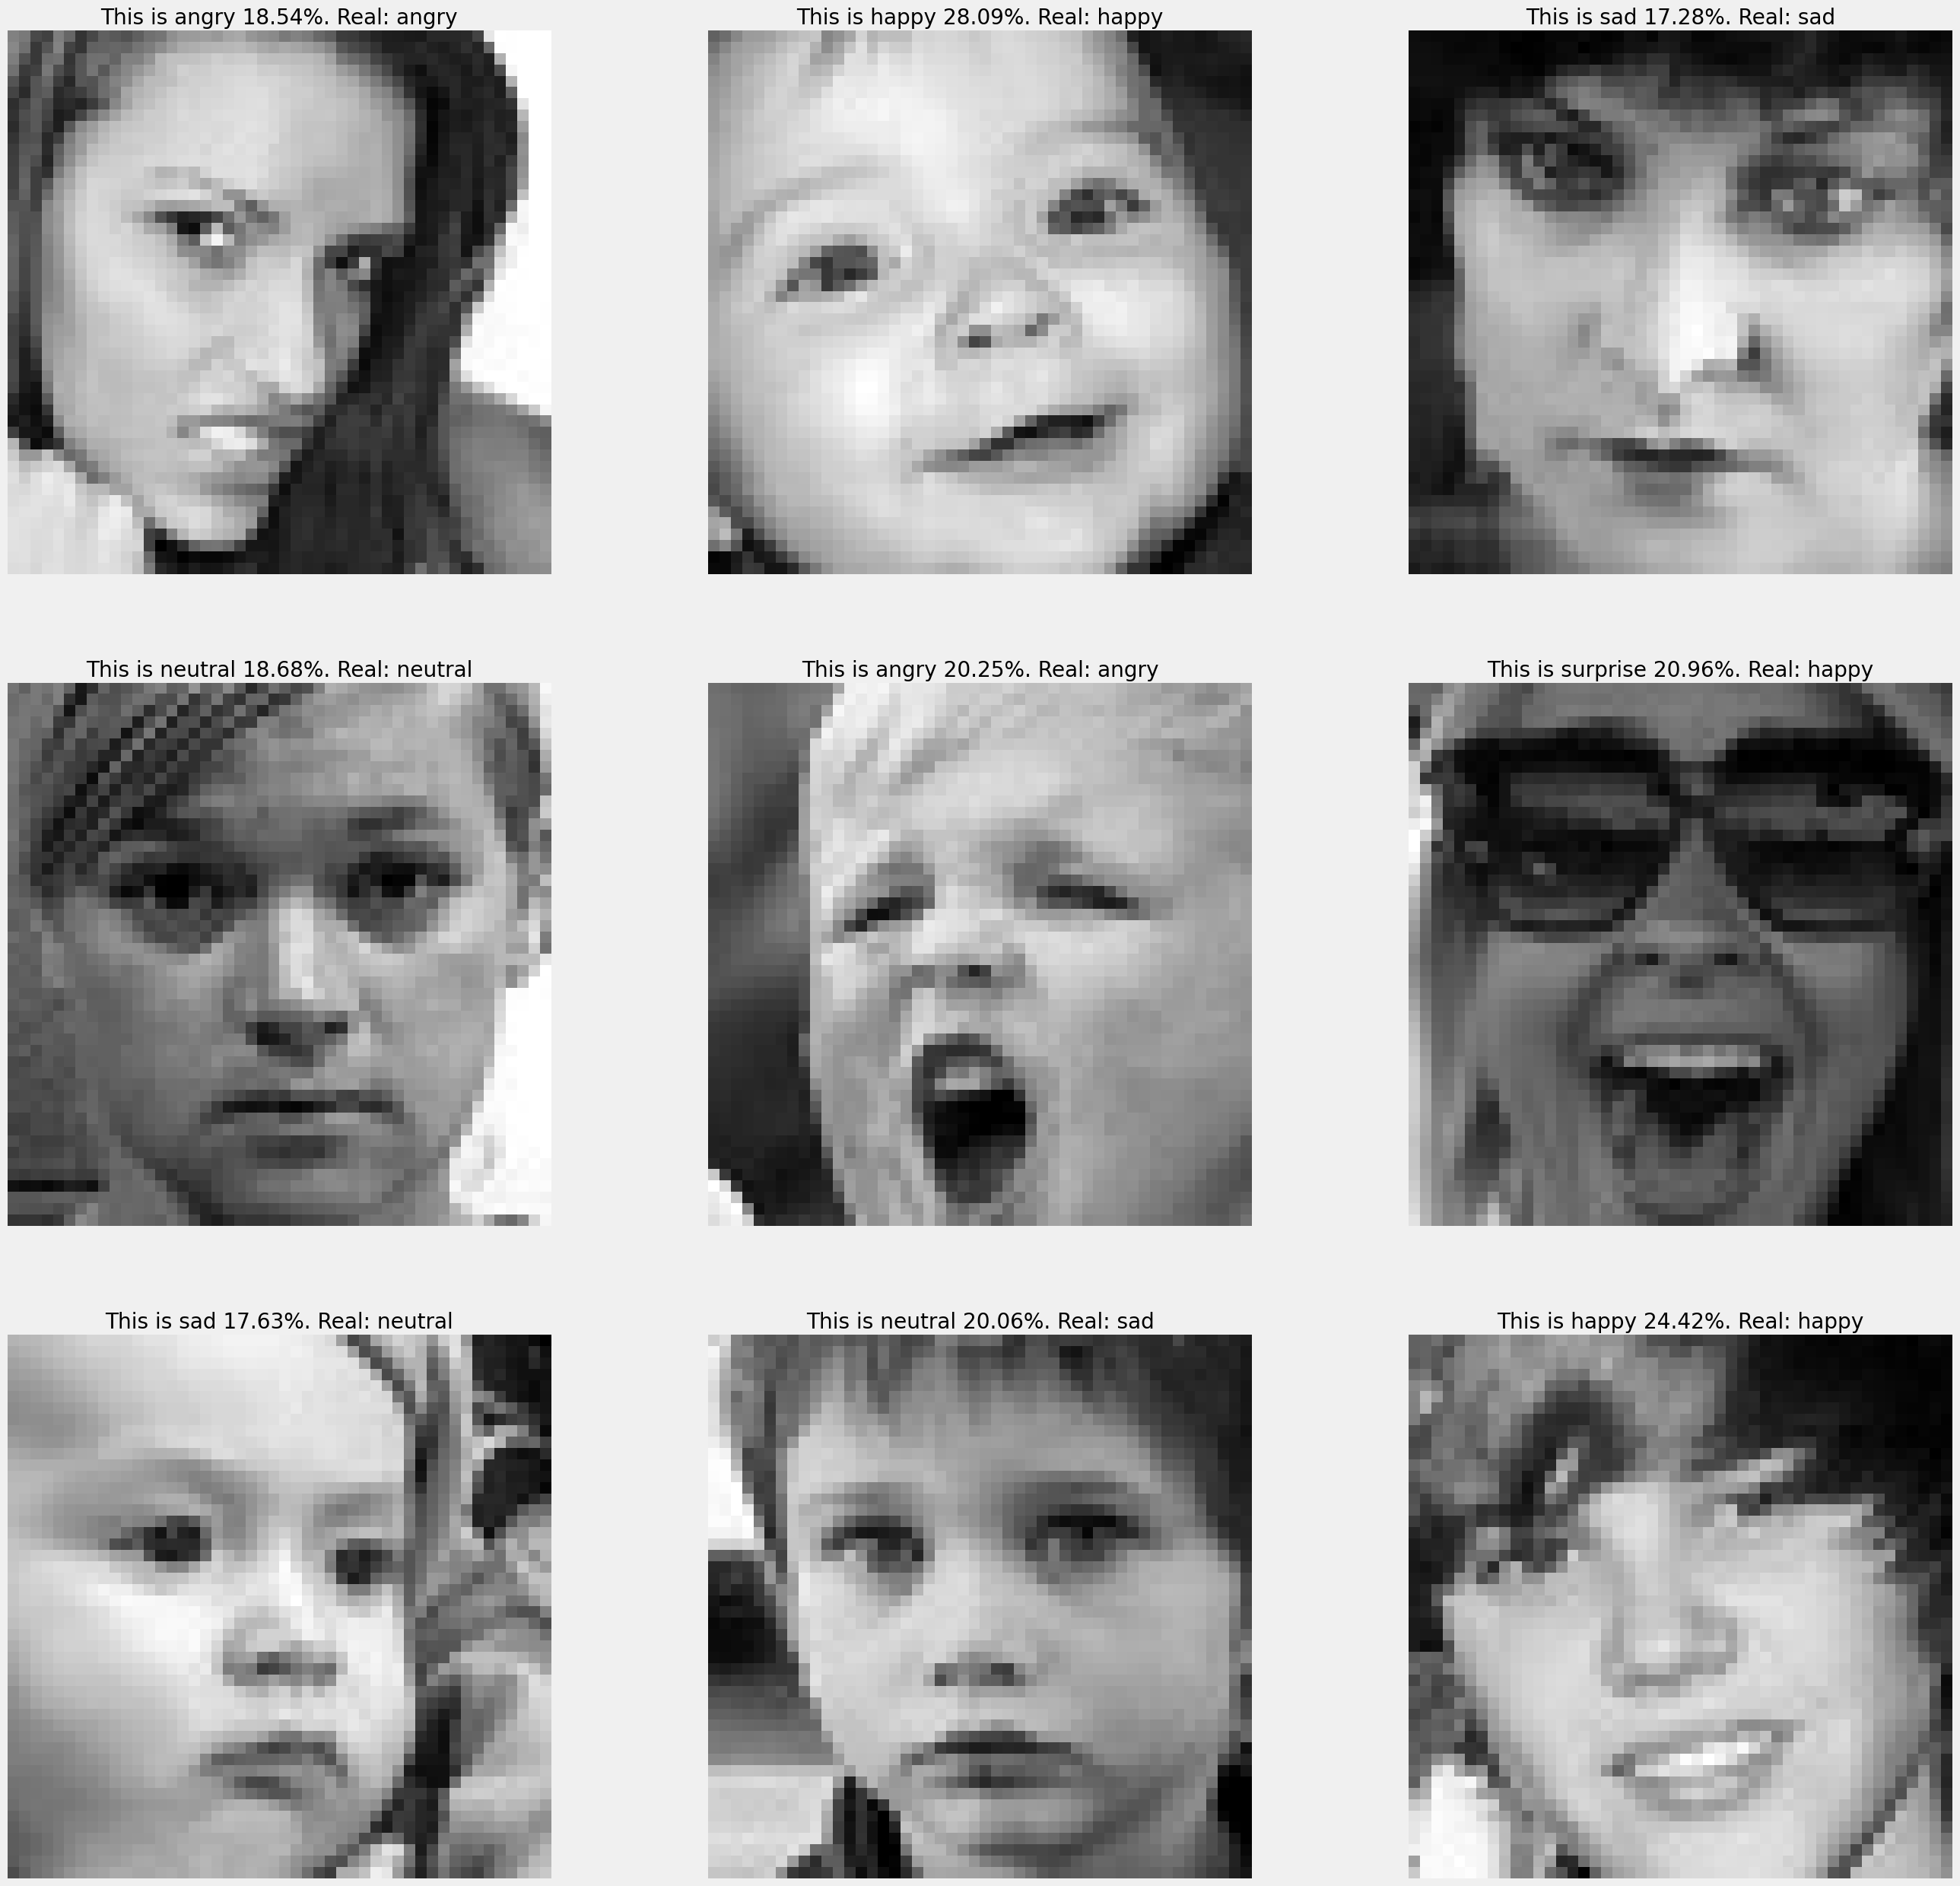

In [ ]:

plt.figure(figsize=(30, 30))
for images, labels in test_ds.take(1):
    print(test_ds.class_names)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
#         plt.title(train_ds.class_names[labels[i]])
        img = images[i].numpy().astype("uint8")
#         img = img*1.0/255
#         print(img)
        plt.imshow(img, cmap="gray")
        img_array = np.expand_dims(img, 0)
#         print(img_array)
        predictions = model_loaded.predict(img_array)
#         print(predictions)
        score = tf.nn.softmax(predictions)
#         print(score)
#         predicted_classes = np.argmax(score)
#         print(predicted_classes)
#         print(score)
        plt.title("This is {} {:.2f}%. Real: {}".format(test_ds.class_names[np.argmax(score)], 100 * np.max(score), test_ds.class_names[np.argmax(labels[i])]))
#         plt.title(train_ds.class_names[np.argmax(labels[i])])
#         print(np.argmax(labels[i]))
        plt.axis("off")